# Testing qipQST

In [1]:
%load_ext autoreload

%autoreload 2
import qipQST as qst
import numpy as np

import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.style.use('default')

In [4]:
print(qst.PiO2X().getMatrix())
print(qst.PiO2Y().getMatrix())

[[0.7071+0.j     0.    -0.7072j]
 [0.    -0.7072j 0.7071+0.j    ]]
[[ 0.7071-0.j -0.7072-0.j]
 [ 0.7072-0.j  0.7071-0.j]]


In [3]:
tau = 2
guess = 0

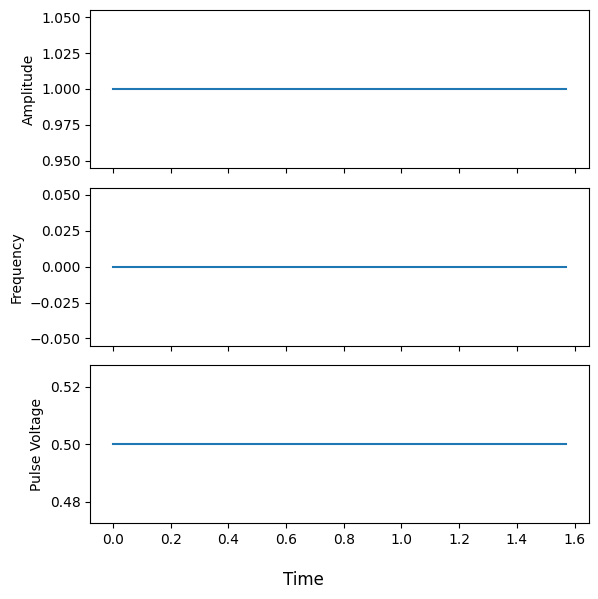

In [4]:
ramseyCircuit = qst.QuantumCircuit(guess)
ramseyCircuit.appendGate(qst.PiO2X())
#ramseyCircuit.appendGate(qst.IdleGate(tau))
#ramseyCircuit.appendGate(qst.PiO2Y())
ramseyCircuit.plotCircuitWaveform()

In [5]:
testSimulator = qst.PulseSimulator()
testSimulator.setQubit(qst.Qubit(0))
testSimulator.setCircuit(ramseyCircuit)
testSimulator.setTimeSteps(1, 10000)

In [6]:
testResult = testSimulator.simulateCircuit(1, 10000)

In [7]:
#%matplotlib qt
#testResult.plotBloch()

0.0


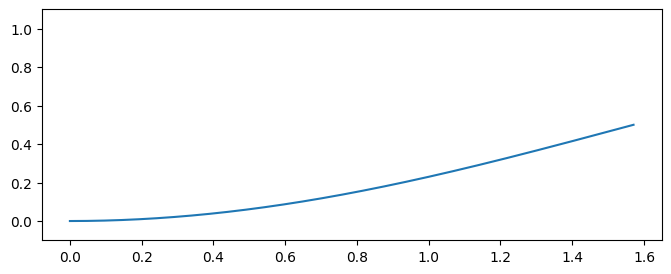

0
0.0
0.0


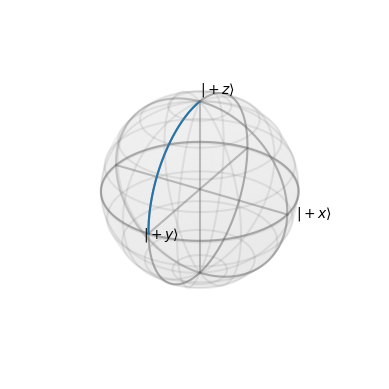

NameError: name 'SpinState' is not defined

In [8]:
%matplotlib inline

#testResult.plotProbability("+X")
#testResult.plotProbability("+Y")
testResult.plotProbability("-Z")
print(testResult.qubit.states[0].getProbability("-Z"))
print(testResult.qubit.getProbs("-Z")[0])
print(testResult.qubit.getProbs()[0])
testResult.plotBloch()
qst.plotBloch(qst,SpinState("-Y"))

# Rabi

## Cycle

In [5]:
time = np.pi * 4
numIterations = 100
#times = np.linspace(0, time, numIterations)

amplitude = 1
larmor = 0
pulseFrequency = 0

detuning = pulseFrequency - larmor

def idealRabi(t):
    return (((amplitude**2) / (detuning**2 + amplitude**2)) * 
            np.sin(np.sqrt(amplitude**2 + detuning**2) * t / 2)**2)

In [6]:
times, rabiCycleProbs = qst.rabi.rabiCycle(larmor, time, amplitude, pulseFrequency, numIterations)

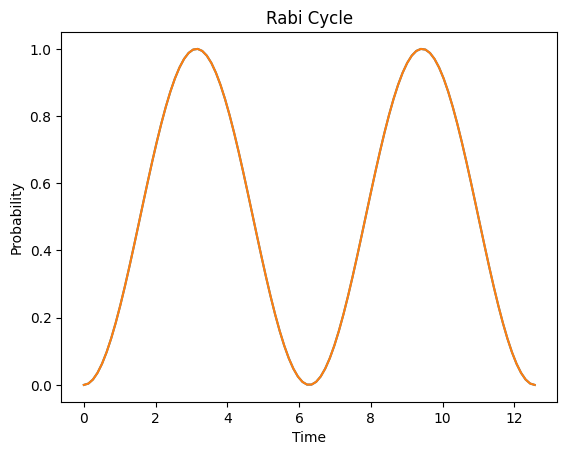

In [7]:
plt.plot(times, rabiCycleProbs)
plt.plot(times, idealRabi(times))
plt.xlabel("Time")
plt.ylabel("Probability")
plt.title("Rabi Cycle")
plt.show()

## Sweep Guess and Time

In [8]:
guessResonances = np.linspace(-3, 3, 21).tolist()
times = np.linspace(0.01, 2, 21).tolist()

In [9]:
#bothResultsRabi = qst.rabi.sweepGuessAndTime(times, guessResonances, 1, numIterations=100)

In [10]:
#X, Y = np.meshgrid(times, guessResonances)
#print(bothResultsRabi)
#pcolorm = plt.pcolormesh(X, Y, bothResultsRabi, shading="nearest", cmap="magma", vmin=0, vmax=1)
#plt.colorbar(pcolorm)
#plt.ylabel("Guess")
#plt.xlabel("Time")
#plt.title("")
#plt.show()

# Ramsey

## Manual

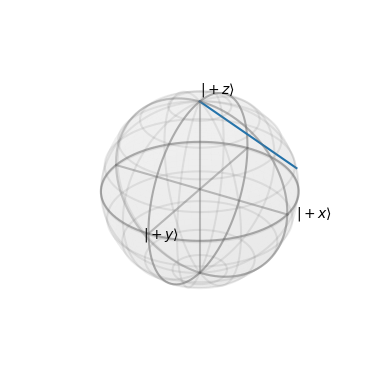

In [ ]:
simulator = qst.PulseSimulator()

larmor = 1
tau = 1.5


ramseyCircuit = qst.QuantumCircuit(larmor)

ramseyCircuit.appendGate(qst.PiO2X())

#ramseyCircuit.appendGate(qst.IdleGate(tau))

#ramseyCircuit.appendGate(qst.PiO2Y())

simulator.setQubit(qst.Qubit(0))

simulator.setCircuit(ramseyCircuit)

results = simulator.simulateCircuit(1000, 100)

results.plotBloch()

## Sweep Guess

In [ ]:
guessResonances = np.linspace(-0.5, 0.5, 101).tolist()

In [ ]:
guessResult = qst.ramsey.sweepGuess(guessResonances, 1.5, 100, "Y")

100%|██████████| 101/101 [00:00<00:00, 166.94it/s]


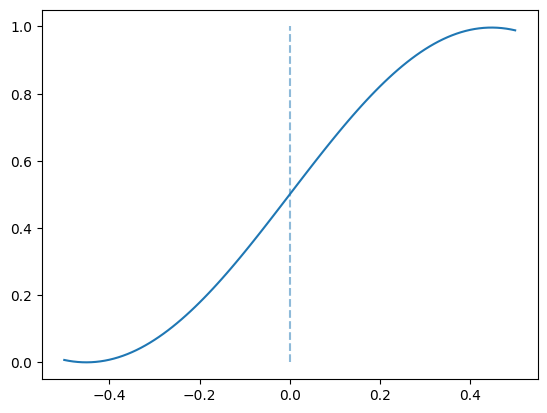

In [ ]:
plt.plot(guessResonances, guessResult)
plt.vlines([0], 0, 1, linestyles="--", alpha=0.5)
plt.show()

## Sweep Tau

In [ ]:
taus = np.linspace(0, 10, 101).tolist()

In [ ]:
tauResults = qst.ramsey.sweepTau(taus, 0.1)

 17%|█▋        | 17/101 [00:01<00:04, 16.91it/s]


KeyboardInterrupt: 

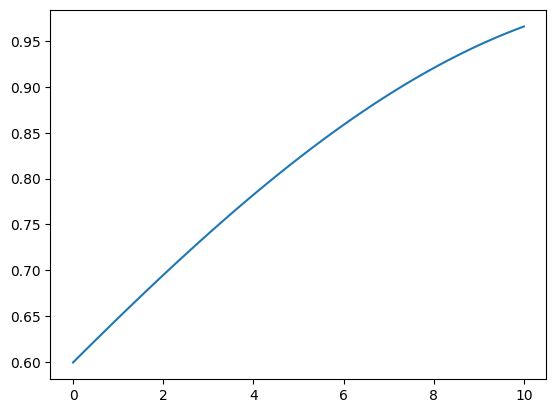

In [ ]:
plt.plot(taus, tauResults)
plt.show()

## Sweep Both

In [ ]:
guessResonances = np.linspace(-3, 3, 101).tolist()
taus = np.linspace(0, 2, 101).tolist()

In [ ]:
bothResultsX = qst.ramsey.sweepGuessAndTau(taus, guessResonances, numIterations=100)
bothResultsY = qst.ramsey.sweepGuessAndTau(taus, guessResonances, numIterations=100, secondGate="Y")

 62%|██████▏   | 63/101 [00:39<00:23,  1.59it/s]


KeyboardInterrupt: 

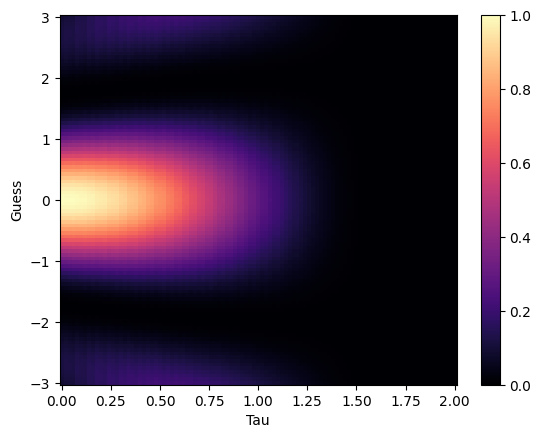

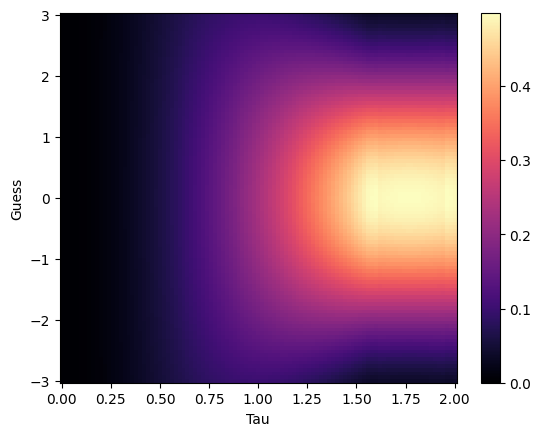

In [ ]:
X, Y = np.meshgrid(taus, guessResonances)
pcolorm = plt.pcolormesh(X, Y, bothResultsX, shading="nearest", cmap="magma")
plt.colorbar(pcolorm)
plt.ylabel("Guess")
plt.xlabel("Tau")
plt.title("")
plt.show()

pcolorm = plt.pcolormesh(X, Y, bothResultsY, shading="nearest", cmap="magma")
plt.colorbar(pcolorm)
plt.ylabel("Guess")
plt.xlabel("Tau")
plt.title("")
plt.show()